In [1]:
!pip install matplotlib==3.4.1

     |████████████████████████████████| 10.3 MB 15.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
!pip install pycaret

     |████████████████████████████████| 320 kB 13.0 MB/s 
     |████████████████████████████████| 2.0 MB 22.2 MB/s 
     |████████████████████████████████| 167 kB 52.5 MB/s 
     |████████████████████████████████| 6.8 MB 48.1 MB/s 
     |████████████████████████████████| 261 kB 57.0 MB/s 
     |████████████████████████████████| 16.7 MB 800 kB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 1.7 MB 31.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 28.6 MB/s 
     |████████████████████████████████| 116 kB 42.3 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 636 kB 39.9 MB/s 
     |████████████████████████████████| 10.9 MB 44.5 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |██████████████████

In [1]:
!pip install shap

     |████████████████████████████████| 564 kB 14.6 MB/s 


In [2]:
!pip install explainerdashboard==0.2.20.1

     |████████████████████████████████| 271 kB 13.9 MB/s 
     |████████████████████████████████| 57 kB 4.6 MB/s 
     |████████████████████████████████| 210 kB 39.7 MB/s 
     |████████████████████████████████| 470 kB 37.1 MB/s 
     |████████████████████████████████| 61 kB 131 kB/s 
     |████████████████████████████████| 9.6 MB 4.9 MB/s 
     |████████████████████████████████| 64 kB 745 kB/s 
     |████████████████████████████████| 357 kB 39.9 MB/s 
     |████████████████████████████████| 136 kB 38.5 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.5-py3-none-any.whl size=67330 sha256=7cffcb17c3b5d4e47586b3996e978ba5c68bd110091b619653d4bb4362bc9913
  Stored in directory: /root/.cache/pip/wheels/9d/84/55/4de0a214e0b9d21a96fc343b4a85547f3dab815a49682dfeb2
  Created wheel for dash-auth: filename=dash_auth-1.4.1-py3-none-any.whl size=476152 sha256=1001e8a7a010207ea122d238d471405bd3ff9bea227687e5d28f0abbed2d3c7e
  Stored in directory: /root/.cache/pip/wheels/19/b2/02/3c3f05988ff

In [4]:
from pycaret.regression import *
#from pycaret.classification import *
from pycaret.utils import check_metric
from pycaret.utils import enable_colab
import pandas as pd 
import numpy as np
from explainerdashboard import ExplainerDashboard
import shap
import matplotlib.pyplot as plt
enable_colab()

Colab mode enabled.


In [6]:
df0 = pd.read_excel('Data_Ecoli.xlsx')

In [7]:
df0.columns

Index(['Bacteria', 'Country', 'Region', 'Code', 'Year',
       'Aminoglycosides_r_percentage', 'Carbapenems_r_percentage',
       'Fluoroquinolones_r_percentage',
       'Third-generation cephalosporins_r_percentage', 'R_multi',
       'DDD_sys_commun', 'per_cap_US', 'GDP_total', 'GDP_health',
       'Out_pocket_exp', 'income_pc', 'rural_pop', 'HDI', 'ctrl_corrup',
       'GOV_effect', 'rule_law', 'total_pop'],
      dtype='object')

In [8]:
df0.head()

Bacteria  Country   Region Code  Year  \
0  Escherichia coli  Austria  Central   AT  2008   
1  Escherichia coli  Austria  Central   AT  2009   
2  Escherichia coli  Austria  Central   AT  2010   
3  Escherichia coli  Austria  Central   AT  2011   
4  Escherichia coli  Austria  Central   AT  2012   

   Aminoglycosides_r_percentage  Carbapenems_r_percentage  \
0                      0.065392                  0.001660   
1                      0.059352                  0.001425   
2                      0.062199                  0.000406   
3                      0.072681                  0.000369   
4                      0.062669                  0.000599   

   Fluoroquinolones_r_percentage  \
0                       0.229244   
1                       0.204893   
2                       0.208889   
3                       0.222644   
4                       0.205540   

   Third-generation cephalosporins_r_percentage   R_multi  DDD_sys_commun  \
0                                      0.074124  0.024365         13.2868   
1                                      0.075472  0.020545         13.6297   
2                                      0.072553  0.019071         13.1338   
3                                      0.091456  0.024719         12.6683   
4                                      0.086523  0.023230         12.1885   

   per_cap_US    GDP_total  GDP_health  Out_pocket_exp  income_pc  rural_pop  \
0      5037.0  51708.76575        9.73       18.243933      49110     42.034   
1      4909.0  47963.17940       10.23       18.051286      49000     42.317   
2      4796.0  46858.04327       10.22       18.601626      49610     42.601   
3      5161.0  51374.95841       10.03       18.739563      50590     42.885   
4      4966.0  48567.69529       10.20       18.674092      50060     42.853   

     HDI  ctrl_corrup  GOV_effect  rule_law  total_pop  
0  0.884     1.843035    1.780840  1.922995    8321496  
1  0.886     1.703025    1.666580  1.784890    8343323  
2  0.895     1.585462    1.841763  1.800300    8363404  
3  0.897     1.431896    1.617761  1.801555    8391643  
4  0.899     1.389731    1.575873  1.858179    8429991

In [9]:
df = df0[['R_multi',
       'DDD_sys_commun', 'per_cap_US', 'GDP_total', 'GDP_health',
       'Out_pocket_exp', 'income_pc', 'rural_pop', 'HDI', 'ctrl_corrup',
       'GOV_effect', 'rule_law', 'total_pop' ]]

In [10]:
df.columns

Index(['R_multi', 'DDD_sys_commun', 'per_cap_US', 'GDP_total', 'GDP_health',
       'Out_pocket_exp', 'income_pc', 'rural_pop', 'HDI', 'ctrl_corrup',
       'GOV_effect', 'rule_law', 'total_pop'],
      dtype='object')

In [11]:
df.head()

R_multi  DDD_sys_commun  per_cap_US    GDP_total  GDP_health  \
0  0.024365         13.2868      5037.0  51708.76575        9.73   
1  0.020545         13.6297      4909.0  47963.17940       10.23   
2  0.019071         13.1338      4796.0  46858.04327       10.22   
3  0.024719         12.6683      5161.0  51374.95841       10.03   
4  0.023230         12.1885      4966.0  48567.69529       10.20   

   Out_pocket_exp  income_pc  rural_pop    HDI  ctrl_corrup  GOV_effect  \
0       18.243933      49110     42.034  0.884     1.843035    1.780840   
1       18.051286      49000     42.317  0.886     1.703025    1.666580   
2       18.601626      49610     42.601  0.895     1.585462    1.841763   
3       18.739563      50590     42.885  0.897     1.431896    1.617761   
4       18.674092      50060     42.853  0.899     1.389731    1.575873   

   rule_law  total_pop  
0  1.922995    8321496  
1  1.784890    8343323  
2  1.800300    8363404  
3  1.801555    8391643  
4  1.858179    8429991

In [12]:
#df = df.astype(float)

In [13]:
df.shape

(319, 13)

In [14]:
X_train = df.sample(frac=0.75, random_state=423)
X_test  = df.drop(X_train.index)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(X_train.shape))
print('Unseen Data For Predictions: ' + str(X_test.shape))

Data for Modeling: (239, 13)
Unseen Data For Predictions: (80, 13)


In [15]:
exp_pycaret = setup(data = X_train,target = 'R_multi',  session_id=23) 

Description             Value
0                               session_id                23
1                                   Target           R_multi
2                            Original Data         (239, 13)
3                           Missing Values             False
4                         Numeric Features                12
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (167, 12)
10                    Transformed Test Set          (72, 12)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              ac77
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [16]:
#models()

In [17]:
compare_models(exclude=['par','llar','dummy','lar','huber','ada','lasso'] )

Model     MAE     MSE    RMSE      R2  \
et                  Extra Trees Regressor  0.0149  0.0006  0.0230  0.6361   
gbr           Gradient Boosting Regressor  0.0152  0.0007  0.0243  0.6296   
rf                Random Forest Regressor  0.0155  0.0007  0.0243  0.6160   
lightgbm  Light Gradient Boosting Machine  0.0169  0.0008  0.0268  0.5293   
ridge                    Ridge Regression  0.0200  0.0009  0.0278  0.4907   
lr                      Linear Regression  0.0212  0.0010  0.0294  0.4321   
br                         Bayesian Ridge  0.0211  0.0010  0.0296  0.4302   
knn                 K Neighbors Regressor  0.0213  0.0011  0.0311  0.3769   
dt                Decision Tree Regressor  0.0199  0.0011  0.0303  0.3647   
omp           Orthogonal Matching Pursuit  0.0218  0.0011  0.0321  0.3313   
en                            Elastic Net  0.0250  0.0013  0.0347  0.2359   

           RMSLE    MAPE  TT (Sec)  
et        0.0209  0.4024     0.399  
gbr       0.0221  0.4649     0.069  
rf        0.0221  0.4736     0.448  
lightgbm  0.0244  0.4833     0.059  
ridge     0.0256  0.6553     0.013  
lr        0.0269  0.7242     0.344  
br        0.0271  0.7234     0.015  
knn       0.0286  0.8550     0.060  
dt        0.0277  0.5543     0.016  
omp       0.0295  0.7835     0.014  
en        0.0315  0.9013     0.015

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=23, verbose=0, warm_start=False)

In [18]:
et = create_model('et')

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0148  0.0004  0.0207  0.4032  0.0193  0.3244
1     0.0064  0.0001  0.0089  0.9243  0.0082  0.1303
2     0.0222  0.0015  0.0385  0.4612  0.0346  0.5139
3     0.0114  0.0002  0.0157  0.7338  0.0145  0.2157
4     0.0094  0.0002  0.0140  0.7877  0.0134  0.3007
5     0.0202  0.0008  0.0290  0.6133  0.0264  0.5205
6     0.0176  0.0007  0.0271  0.7498  0.0236  0.2436
7     0.0147  0.0004  0.0207  0.8361  0.0189  0.6528
8     0.0151  0.0009  0.0305  0.5841  0.0269  0.1992
9     0.0175  0.0006  0.0252  0.2674  0.0234  0.9232
Mean  0.0149  0.0006  0.0230  0.6361  0.0209  0.4024
Std   0.0046  0.0004  0.0084  0.1981  0.0073  0.2350

In [19]:
print(et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=23, verbose=0, warm_start=False)


In [20]:
plot_model(et,save=True)

'Residuals.png'

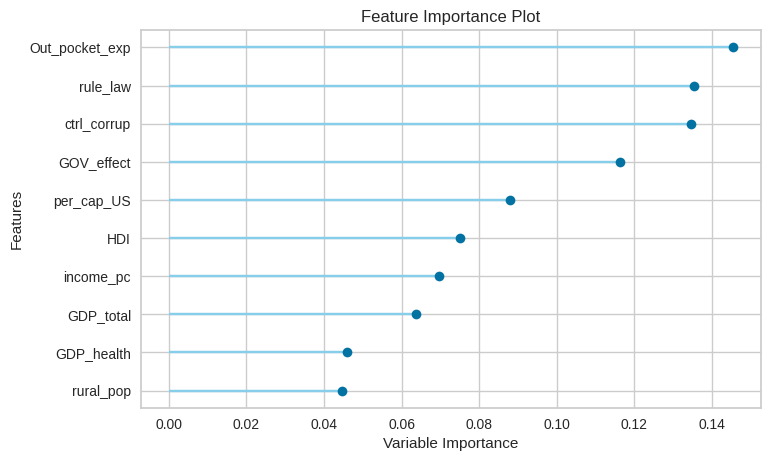

In [21]:
plot_model(et, plot='feature')

In [22]:
y_pred = predict_model(et, data=X_test)
#y_pred.head()
check_metric(y_pred.R_multi, y_pred.Label, 'R2')

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  0.0109  0.0003  0.0163  0.8173  0.0152  0.3706

0.8173

In [ ]:
tuned_et = tune_model(et)

MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0596  0.0091  0.0953  0.7755  0.0698  1.2116
1     0.0392  0.0029  0.0538  0.8951  0.0428  0.3457
2     0.0690  0.0114  0.1070  0.2678  0.0898  0.4192
3     0.0493  0.0067  0.0819  0.7416  0.0638  0.4261
4     0.0501  0.0058  0.0760  0.7701  0.0579  0.2593
5     0.0601  0.0070  0.0839  0.7257  0.0668  0.3905
6     0.0540  0.0072  0.0848  0.7491  0.0645  0.3501
7     0.0723  0.0102  0.1010  0.6312  0.0811  0.6213
8     0.0331  0.0019  0.0439  0.8360  0.0379  0.8698
9     0.0583  0.0076  0.0874  0.6987  0.0645  0.3197
Mean  0.0545  0.0070  0.0815  0.7091  0.0639  0.5213
Std   0.0116  0.0028  0.0187  0.1621  0.0147  0.2853

In [ ]:
#tuned_parameters = { 'learning_rate': [0.00001,0.0001,0.001],  'n_estimators': np.arange(20, 200, 20)}
#tuned_parameters = { 'learning_rate': [0.00001,0.0001,0.001],  'n_estimators': [20,50,100,200]}  
#tuned_parameters = { 'learning_rate': [0.00001,0.0001,0.001,0.01,0.1],  'n_estimators': np.arange(20, 200, 40)} 

In [ ]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=9, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0002,
                    min_impurity_split=None, min_samples_leaf=6,
                    min_samples_split=9, min_weight_fraction_leaf=0.0,
                    n_estimators=70, n_jobs=-1, oob_score=False,
                    random_state=23, verbose=0, warm_start=False)


In [ ]:
plot_model(tuned_et,save=True)

'Residuals.png'

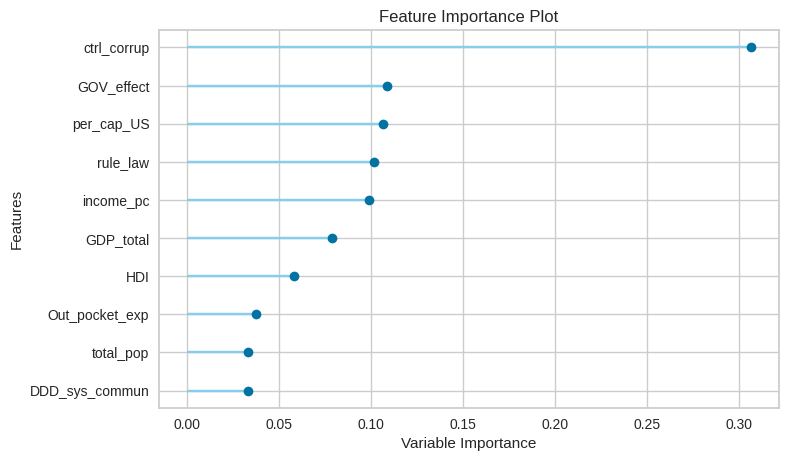

In [ ]:
plot_model(tuned_et, plot='feature')

In [23]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# y_pred = predict_model(tuned_et, data=X_test)
# check_metric(y_pred.R_multi, y_pred.Label, 'R2')

In [24]:
save_model(et,'ET_Ecoli_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='R_multi',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                    

In [25]:
df2 =pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : 
                   abs(et.feature_importances_)}).sort_values(by='Value', ascending=False)

In [26]:
df2

Feature     Value
4   Out_pocket_exp  0.145422
10        rule_law  0.135418
8      ctrl_corrup  0.134705
9       GOV_effect  0.116301
1       per_cap_US  0.088060
7              HDI  0.075151
5        income_pc  0.069767
2        GDP_total  0.063819
3       GDP_health  0.046046
6        rural_pop  0.044543
0   DDD_sys_commun  0.041007
11       total_pop  0.039760

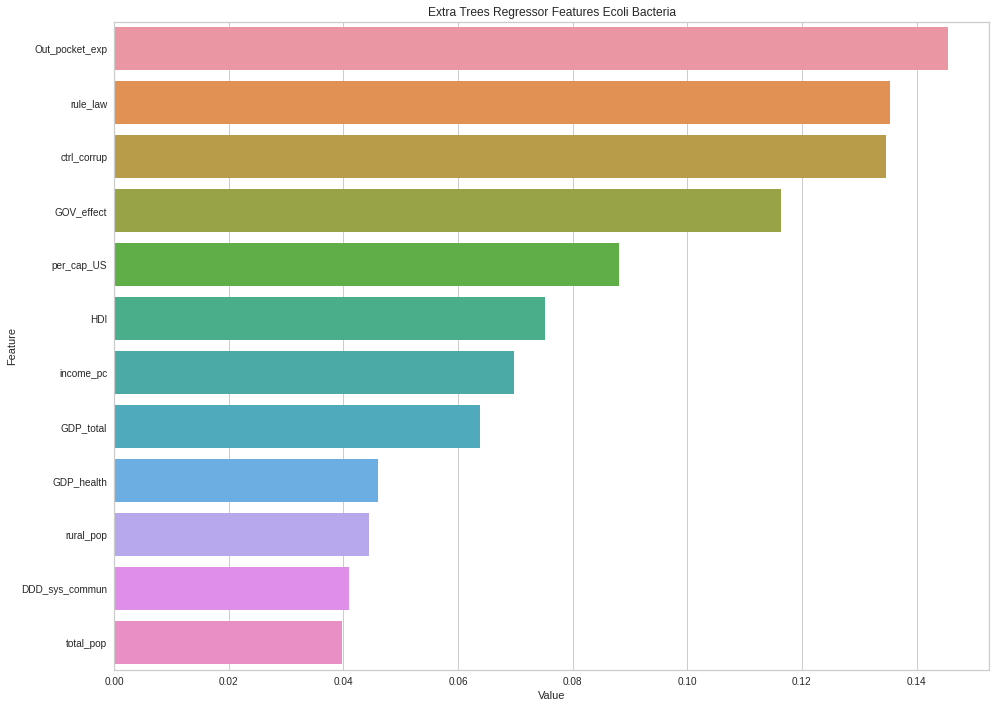

In [33]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = df2

plt.figure(figsize=(14, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Extra Trees Regressor Features Ecoli Bacteria')
plt.tight_layout()
plt.savefig('et_importances_Ecoli.jpg')

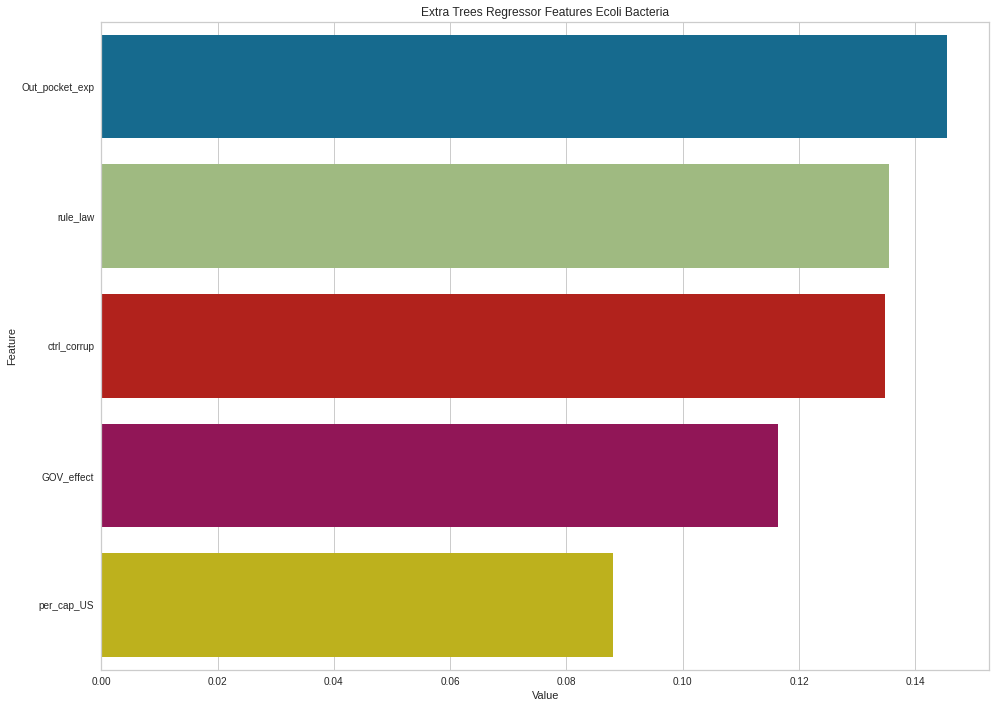

In [34]:
feature_imp = df2[:5]

plt.figure(figsize=(14, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Extra Trees Regressor Features Ecoli Bacteria')
plt.tight_layout()
plt.savefig('et_importances_Top5.jpg')

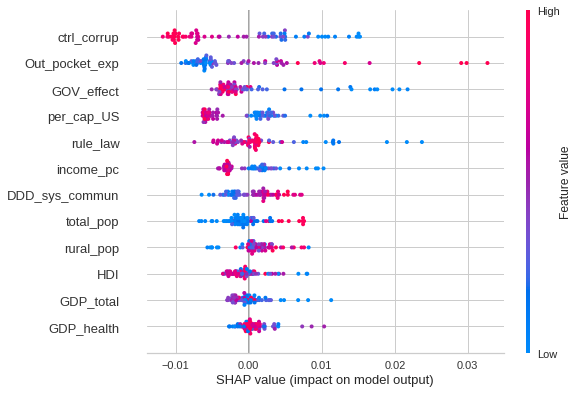

In [29]:
interpret_model(et)

In [30]:
interpret_model(et,save=True)

In [32]:
#interpret_model(et, plot = 'msa',save=True)

In [35]:
#ExplainerDashboard(et)

In [ ]:
#!pip install linearmodels

In [ ]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

In [ ]:
X = df.drop(['occupancy'],axis=1)

In [ ]:
X.shape

(28288, 242)

In [ ]:
exog = sm.tools.tools.add_constant(X[['month_of_year','day_of_week','day_of_month','Capacity','Dist_bank','Dist_restaurant',
                                      'Dist_hosp','Dist_university','Dist_school','Dist_church']])
endog = df['occupancy']

In [ ]:
# random effects model
model_re = RandomEffects(endog, exog,check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:              occupancy   R-squared:                        0.0805
Estimator:              RandomEffects   R-squared (Between):              0.1688
No. Observations:               28288   R-squared (Within):               0.0786
Date:                Mon, Mar 14 2022   R-squared (Overall):              0.0903
Time:                        03:07:47   Log-likelihood                -7.228e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      247.55
Entities:                         544   P-value                           0.0000
Avg Obs:                       52.000   Distribution:                F(10,28277)
Min Obs:                       52.000                                           
Max Obs:                       52.000   F-statistic (robust):             247.55
                            

In [ ]:
model_fe = PanelOLS(endog, exog, entity_effects = True,check_rank= False,drop_absorbed=True) 
fe_res = model_fe.fit() 
#print results
print(fe_res)

/usr/local/lib/python3.7/dist-packages/linearmodels/panel/model.py:1833: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

day_of_week, is_weekend, day_of_month, month_of_year, Dist_park, Dist_coffee, Dist_clinic, Dist_club, Dist_cinema, Dist_college, Number of households with 0 vehicle, Number of households with 1 vehicles, Number of households with 2 vehicles, Number of households with 3 vehicles, Number of households with 4 vehicles, Number of households with 0 licenced drivers, Number of households with 1 licenced drivers, Number of households with 2 licenced drivers, Number of households with 3 licenced drivers, Number of households with 4 licenced drivers, Number of households with 5 or more licenced drivers, Number of households with unknown number of licenced drivers, Number of households with 0 full-time employee, Number of households with 1 full-time employees, Number of households with 2 full-time employees, Number of househol

                          PanelOLS Estimation Summary                           
Dep. Variable:              occupancy   R-squared:                        0.2106
Estimator:                   PanelOLS   R-squared (Between):           -2.22e-16
No. Observations:               28288   R-squared (Within):               0.2106
Date:                Mon, Mar 14 2022   R-squared (Overall):              0.1833
Time:                        03:01:52   Log-likelihood                -6.982e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      336.18
Entities:                         544   P-value                           0.0000
Avg Obs:                       52.000   Distribution:                F(22,27722)
Min Obs:                       52.000                                           
Max Obs:                       52.000   F-statistic (robust):             336.18
                            

In [ ]:
model_fe = PanelOLS(endog, exog, entity_effects = False,check_rank= False) 
fe_res = model_fe.fit() 
#print results
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              occupancy   R-squared:                        0.0903
Estimator:                   PanelOLS   R-squared (Between):              0.1688
No. Observations:               28288   R-squared (Within):               0.0786
Date:                Mon, Mar 14 2022   R-squared (Overall):              0.0903
Time:                        03:13:38   Log-likelihood                 -7.38e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      280.75
Entities:                         544   P-value                           0.0000
Avg Obs:                       52.000   Distribution:                F(10,28277)
Min Obs:                       52.000                                           
Max Obs:                       52.000   F-statistic (robust):             280.75
                            